In [26]:
import pandas as pd
import plotly.express as px
from src.utils import dataframe_coeficientes

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

import seaborn as sns

RANDOM_STATE = 42

In [27]:
df = pd.read_parquet('../dados/diabete_categorizado.parquet')
df

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,triglicerides,glicose,target,colesterol_hdl_cat
0,59,2,32.1,101.00,157,93.2,38.0,4.8598,87,151,4-5
1,48,1,21.6,87.00,183,103.2,70.0,3.8918,69,75,2-3
2,72,2,30.5,93.00,156,93.6,41.0,4.6728,85,141,4-5
3,24,1,25.3,84.00,198,131.4,40.0,4.8903,89,206,4-5
4,50,1,23.0,101.00,192,125.4,52.0,4.2905,80,135,4-5
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.9836,93,178,4-5
438,47,2,24.9,75.00,225,166.0,42.0,4.4427,102,104,4-5
439,60,2,24.9,99.67,162,106.6,43.0,4.1271,95,132,4-5
440,36,1,30.0,95.00,201,125.2,42.0,5.1299,85,220,4-5


In [28]:
colunas_power_transform = ["imc", "ldl", "hdl", "colesterol_total"]

coluna_target = ["target"]

coluna_ordinal_encoder = ["colesterol_hdl_cat"]

coluna_one_hot_encoder = ["sexo"]

coluna_standard_scaler = [
    coluna for coluna in df.columns if coluna not in colunas_power_transform + coluna_target + coluna_ordinal_encoder + coluna_one_hot_encoder
]

coluna_standard_scaler

['idade', 'pressao_media', 'triglicerides', 'glicose']

In [29]:
categorias_ordinal_encoder = [
    ["2-3", "4-5", "6+"],
]

## Pipeline


In [ ]:
X = df.drop(columns='target')
y = df['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [32]:
preprocessamento = ColumnTransformer([
    ("power_transform", PowerTransformer(method='box-cox'), colunas_power_transform),
    ("stander_scaler", StandardScaler(), coluna_standard_scaler),
    ("ordinal_encoder", OrdinalEncoder(categories=categorias_ordinal_encoder), coluna_ordinal_encoder),
    ("one_hot_encoder", OneHotEncoder(drop='if_binary'), coluna_one_hot_encoder)
])

pipeline = Pipeline([
    ("prepocessor", preprocessamento),
    ("reg", LinearRegression())
])

pipeline

Pipeline(steps=[('prepocessor',
                 ColumnTransformer(transformers=[('power_transform',
                                                  PowerTransformer(method='box-cox'),
                                                  ['imc', 'ldl', 'hdl',
                                                   'colesterol_total']),
                                                 ('stander_scaler',
                                                  StandardScaler(),
                                                  ['idade', 'pressao_media',
                                                   'triglicerides',
                                                   'glicose']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['2-3',
                                                                              '4-5',
                                                                              '6+']]),
                                                  ['colesterol_hdl_cat']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sexo'])])),
                ('reg', LinearRegression())])

In [34]:
regressor = TransformedTargetRegressor(
    regressor=pipeline,
    transformer=QuantileTransformer(n_quantiles=20, output_distribution='normal')
)
regressor

TransformedTargetRegressor(regressor=Pipeline(steps=[('prepocessor',
                                                      ColumnTransformer(transformers=[('power_transform',
                                                                                       PowerTransformer(method='box-cox'),
                                                                                       ['imc',
                                                                                        'ldl',
                                                                                        'hdl',
                                                                                        'colesterol_total']),
                                                                                      ('stander_scaler',
                                                                                       StandardScaler(),
                                                                                       ['idade',
                                                                                        'pressao_media',
                                                                                        'triglicerides',
                                                                                        'glicose']),
                                                                                      ('ordinal_encoder',
                                                                                       OrdinalEncoder(categories=[['2-3',
                                                                                                                   '4-5',
                                                                                                                   '6+']]),
                                                                                       ['colesterol_hdl_cat']),
                                                                                      ('one_hot_encoder',
                                                                                       OneHotEncoder(drop='if_binary'),
                                                                                       ['sexo'])])),
                                                     ('reg',
                                                      LinearRegression())]),
                           transformer=QuantileTransformer(n_quantiles=20,
                                                           output_distribution='normal'))

In [35]:
regressor.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('prepocessor',
                                                      ColumnTransformer(transformers=[('power_transform',
                                                                                       PowerTransformer(method='box-cox'),
                                                                                       ['imc',
                                                                                        'ldl',
                                                                                        'hdl',
                                                                                        'colesterol_total']),
                                                                                      ('stander_scaler',
                                                                                       StandardScaler(),
                                                                                       ['idade',
                                                                                        'pressao_media',
                                                                                        'triglicerides',
                                                                                        'glicose']),
                                                                                      ('ordinal_encoder',
                                                                                       OrdinalEncoder(categories=[['2-3',
                                                                                                                   '4-5',
                                                                                                                   '6+']]),
                                                                                       ['colesterol_hdl_cat']),
                                                                                      ('one_hot_encoder',
                                                                                       OneHotEncoder(drop='if_binary'),
                                                                                       ['sexo'])])),
                                                     ('reg',
                                                      LinearRegression())]),
                           transformer=QuantileTransformer(n_quantiles=20,
                                                           output_distribution='normal'))

In [36]:
regressor.regressor_.named_steps

{'prepocessor': ColumnTransformer(transformers=[('power_transform',
                                  PowerTransformer(method='box-cox'),
                                  ['imc', 'ldl', 'hdl', 'colesterol_total']),
                                 ('stander_scaler', StandardScaler(),
                                  ['idade', 'pressao_media', 'triglicerides',
                                   'glicose']),
                                 ('ordinal_encoder',
                                  OrdinalEncoder(categories=[['2-3', '4-5',
                                                              '6+']]),
                                  ['colesterol_hdl_cat']),
                                 ('one_hot_encoder',
                                  OneHotEncoder(drop='if_binary'), ['sexo'])]),
 'reg': LinearRegression()}

In [37]:
reg: LinearRegression = regressor.regressor_['reg']

reg.coef_

array([ 0.31483244,  0.31892997,  0.04103169, -0.54429918,  0.02065788,
        0.16631546,  0.45027739,  0.03326155,  0.18542354, -0.31685866])

In [39]:
reg.intercept_

0.016668202537936234

In [41]:
regressor.regressor_['prepocessor'].feature_names_in_

array(['idade', 'sexo', 'imc', 'pressao_media', 'colesterol_total', 'ldl',
       'hdl', 'triglicerides', 'glicose', 'colesterol_hdl_cat'],
      dtype=object)

In [42]:
regressor.regressor_['prepocessor'].get_feature_names_out()

array(['power_transform__imc', 'power_transform__ldl',
       'power_transform__hdl', 'power_transform__colesterol_total',
       'stander_scaler__idade', 'stander_scaler__pressao_media',
       'stander_scaler__triglicerides', 'stander_scaler__glicose',
       'ordinal_encoder__colesterol_hdl_cat', 'one_hot_encoder__sexo_2'],
      dtype=object)

In [43]:
dataframe_coeficientes(reg.coef_,regressor.regressor_['prepocessor'].get_feature_names_out())


,coeficiente
power_transform__colesterol_total,-0.544299
one_hot_encoder__sexo_2,-0.316859
stander_scaler__idade,0.020658
stander_scaler__glicose,0.033262
power_transform__hdl,0.041032
stander_scaler__pressao_media,0.166315
ordinal_encoder__colesterol_hdl_cat,0.185424
power_transform__imc,0.314832
power_transform__ldl,0.318930
stander_scaler__triglicerides,0.450277


In [44]:
y_pred = regressor.predict(X_test)

In [45]:
mean_absolute_error(y_test, y_pred)

42.037268449435025

In [46]:
mean_squared_error(y_test, y_pred)

2908.101178710582

In [47]:
root_mean_squared_error(y_test, y_pred)

53.92681317035694

In [48]:
r2_score(y_test, y_pred)

0.45111025188646126

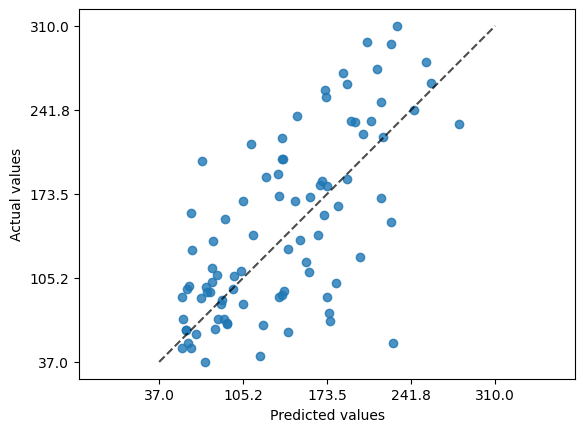

In [49]:
from sklearn.metrics import PredictionErrorDisplay

PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_pred,
    kind='actual_vs_predicted'
)